In [1]:
import time
t1 = time.time()

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix
import h5py
import matplotlib.pyplot as plt

In [2]:
##### load data #####

data_path = '/data/Chen-Wang/data_HLfeature.h5'
data_file = h5py.File(data_path, 'r')
data_file.keys()

test_path = '/data/Chen-Wang/test_data_HLfeature.h5'
test_file = h5py.File(test_path, 'r')
data_file.keys()

<KeysViewHDF5 ['H_0', 'H_1', 'J1_tau21', 'J2_tau21', 'LB_1', 'SS_0', 'SS_1', 'X_HH', 'deta_JJ', 'iht', 'm_J1', 'm_J2', 'm_JJ', 'target2', 'target3']>

In [3]:
##### scratch data #####

features_tradition = ['X_HH', 'iht', 'm_JJ', 'm_J1', 'm_J2', 'deta_JJ', 'J1_tau21', 'J2_tau21']
features_TDA = ['X_HH', 'iht', 'm_JJ', 'm_J1', 'm_J2', 'deta_JJ', 'J1_tau21', 'J2_tau21', 'H_0', 'H_1', 'SS_0', 'SS_1', 'LB_1']

target_2 = ['signal', 'background']
target_3 = ['signal', 'ttbarBG', 'jjBG']
                
train_data = []
for feature in features_tradition:
# for feature in features_TDA:
    train_data.append(data_file[feature][:])
train_data = np.array(train_data).T
train_target = data_file['target2'][:]

test_data = []
for feature in features_tradition:
# for feature in features_TDA:
    test_data.append(test_file[feature][:])
test_data = np.array(test_data).T
test_target = test_file['target2'][:]

print("shape of training data:", np.shape(train_data))
print("shape of training target:", np.shape(train_target))

print("shape of testing data:", np.shape(test_data))
print("shape of testing target:", np.shape(test_target))

shape of training data: (1289549, 8)
shape of training target: (1289549,)
shape of testing data: (304101, 8)
shape of testing target: (304101,)


Training score:  0.7359906447913185


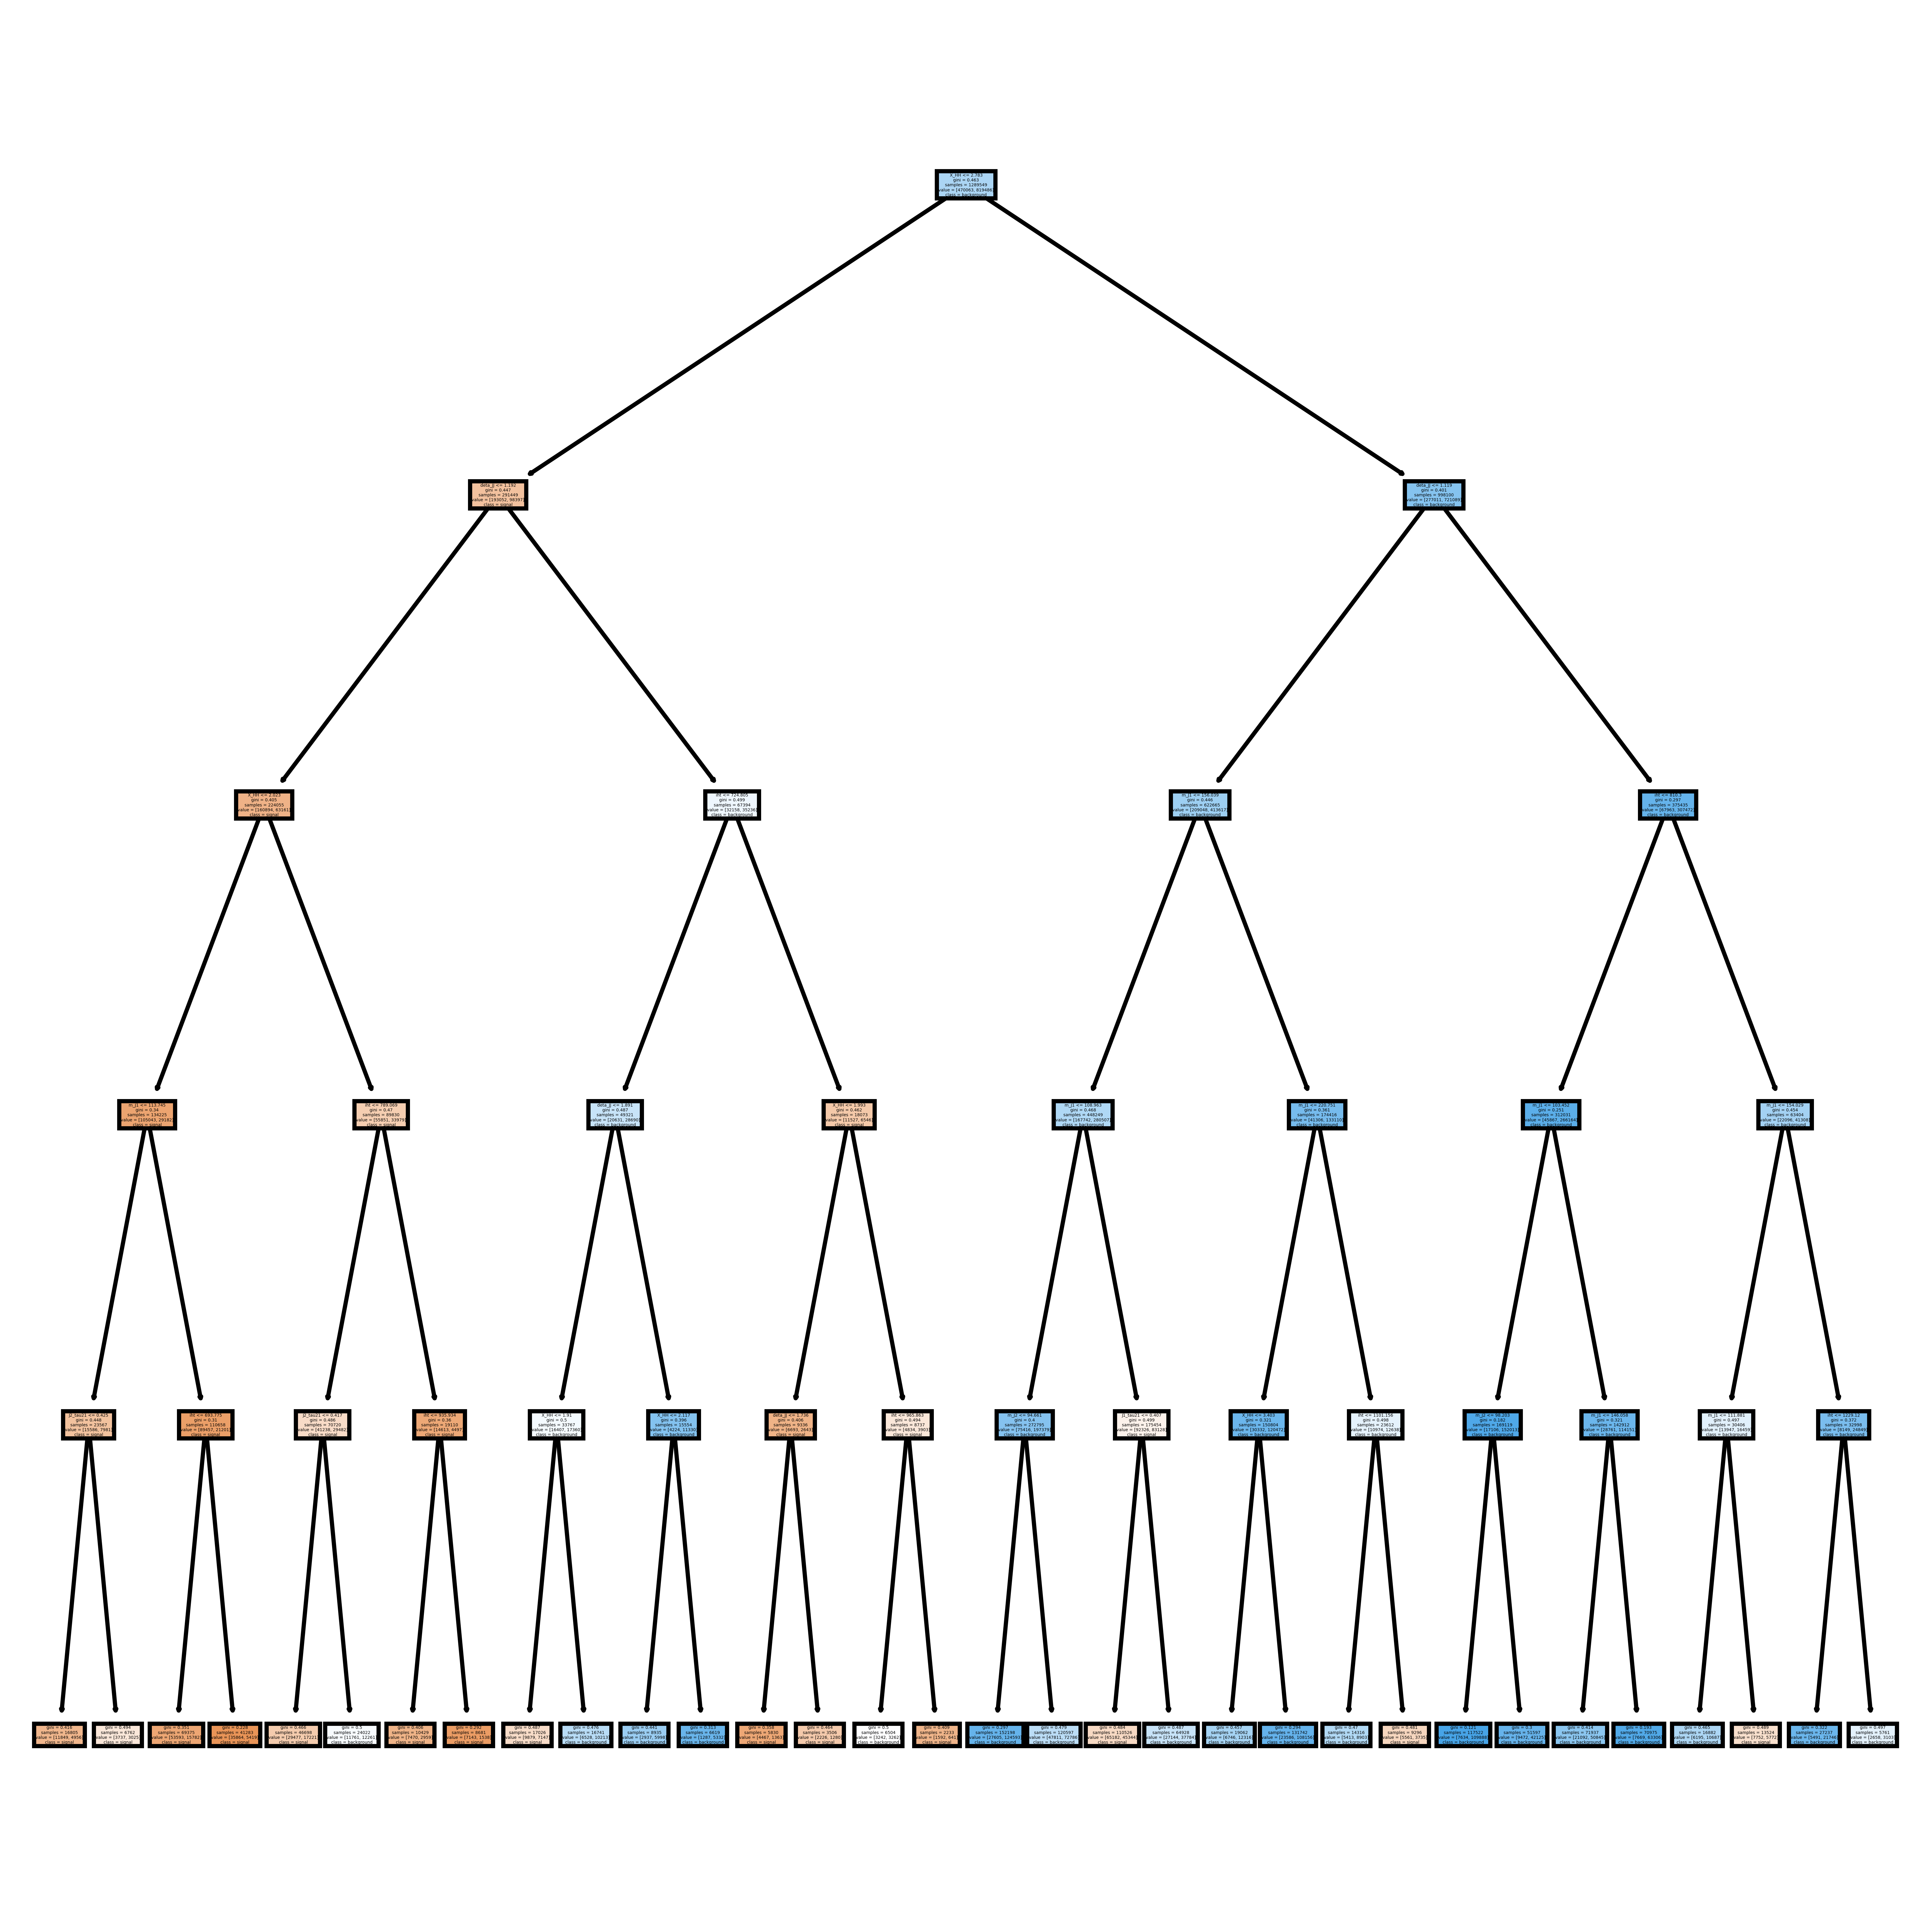

In [4]:
##### fit decision tree #####

model_tree = tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(train_data, train_target)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1000)
tree.plot_tree(model_tree, feature_names=features_tradition, class_names=target_2, filled=True)

print("Training score: ", model_tree.score(train_data, train_target))

In [5]:
##### plot the training confusion matrix #####

target_pred = model_tree.predict(train_data)
print("The confusion matrix is:")
print(confusion_matrix(train_target, target_pred))

The confusion matrix is:
[[245792 224271]
 [116182 703304]]


In [6]:
##### plot the testing confusion matrix #####

print("Testing score: ", model_tree.score(test_data, test_target))

predtion = model_tree.predict(test_data)
print("The confusion matrix is:")
print(confusion_matrix(test_target, predtion))

Testing score:  0.7039667741967307
The confusion matrix is:
[[ 73313  66958]
 [ 23066 140764]]


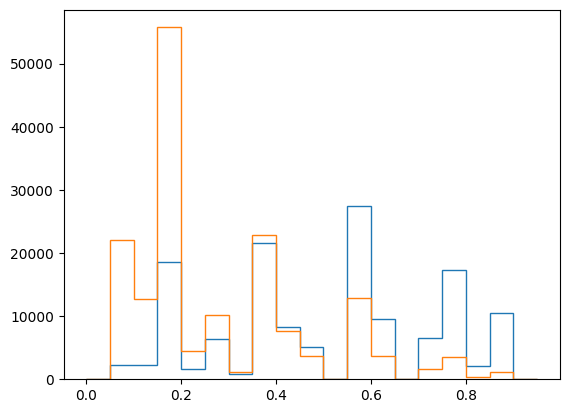

In [7]:
prediction_probability = model_tree.predict_proba(test_data)

bins = np.arange(0,1,0.05)
plt.hist(prediction_probability[0:140271,0], histtype='step', bins=bins)
plt.hist(prediction_probability[140271:140271+163830,0], histtype='step', bins=bins)
plt.show()